In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
City_data = pd.read_csv(city_data_to_load)
Ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
combine_city_ride = pd.merge(City_data, Ride_data, on="city", how="outer")
# Display the data table for preview
combine_city_ride.head(10)

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850
5,Richardfort,38,Urban,2018-04-21 03:44:04,9.54,3698147103219
6,Richardfort,38,Urban,2018-02-03 00:14:26,29.04,4982665519010
7,Richardfort,38,Urban,2018-02-08 15:50:12,16.55,2270463070874
8,Richardfort,38,Urban,2018-04-03 15:07:34,40.77,9496210735824
9,Richardfort,38,Urban,2018-02-19 14:09:20,27.11,8690324801449


## Bubble Plot of Ride Sharing Data

In [2]:
# Obtain the x and y coordinates for each of the three city types
def Cal_fare_ride_drivers(Type_data):
    read_data = combine_city_ride.loc[combine_city_ride['type'] == Type_data].groupby(
        'city')
    AveFare = read_data['fare'].mean()
    Number_rides = read_data['ride_id'].count()
    Number_drivers = read_data['driver_count'].first()
    # return the Average Fare,Number of rides amd Number of Drivers
    return AveFare, Number_rides, Number_drivers

In [3]:
# City Type (Urban, Suburban, Rural)
# Average Fare ($) Per City
Urban_average_fare = Cal_fare_ride_drivers('Urban')[0]
Suburban_average_fare = Cal_fare_ride_drivers('Suburban')[0]
Rural_average_fare = Cal_fare_ride_drivers('Rural')[0]

# Total Number of Rides Per City
Urban_number_rides = Cal_fare_ride_drivers('Urban')[1]
Suburban_number_rides = Cal_fare_ride_drivers('Suburban')[1]
Rural_number_rides = Cal_fare_ride_drivers('Rural')[1]

# Total Number of Drivers Per City
Urban_number_drivers = Cal_fare_ride_drivers('Urban')[2]
Suburban_number_drivers = Cal_fare_ride_drivers('Suburban')[2]
Rural_number_drivers = Cal_fare_ride_drivers('Rural')[2]

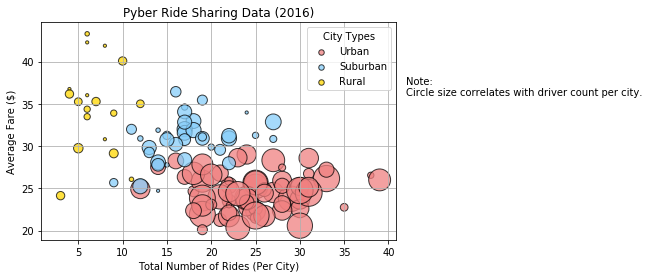

In [4]:
# Setup the figure 
fig = plt.figure(figsize=(14, 4))
# set the plot in the first half of the the figure and keep second half for the text:Note
ax = fig.add_subplot(121)
# Build the scatter plots for each city types
ax.scatter(Urban_number_rides, Urban_average_fare, s=Urban_number_drivers*10,
           color='lightcoral', alpha=0.75, edgecolor='k', linewidth=1, label='Urban')
ax.scatter(Suburban_number_rides, Suburban_average_fare, s=Suburban_number_drivers*10,
           color='lightskyblue', alpha=0.75, edgecolor='k', linewidth=1, label='Suburban')
ax.scatter(Rural_number_rides, Rural_average_fare, s=Rural_number_drivers*10,
           color='gold', alpha=0.75, edgecolor='k', linewidth=1, label='Rural')

# Incorporate the other graph properties
ax.title.set_text('Pyber Ride Sharing Data (2016)')
ax.set_xlabel("Total Number of Rides (Per City)")
ax.set_ylabel("Average Fare ($)")
ax.grid()
# Create a legend and the size of the legend
lgnd = plt.legend(loc="upper right", numpoints=1,
                  fontsize=10, frameon=True, title="City Types")
for handle in lgnd.legendHandles:
    handle.set_sizes([30.0])
# Incorporate a text label regarding circle size
Note = "Note:\nCircle size correlates with driver count per city."
plt.text(42, 36, Note, fontsize=10)
# Show plot
plt.show()
# Save Figure
fig.savefig("Results/Pyber_ride_bubble_plot.png")

## Total Fares by City Type

In [5]:
# The defination to build the pie chart, 2 arrguments as label and sizes
def Build_pie_chart(City_index, City_values):
    # Labels for the sections of 'Total Fare by city' pie chart
    labels = City_index
    # The values of each section of 'Total Fare by city' pie chart
    sizes = City_values
    # The colors of each section of the pie chart
    colors = ["gold", "lightskyblue", "lightcoral"]
    # Tells matplotlib to seperate the "Urban" section from the others
    explode = (0, 0, 0.1)
    # Creates the pie chart based upon the values above
    # Automatically finds the percentages of each part of the pie chart
    plt.pie(sizes, explode=explode, labels=labels, colors=colors,
            autopct="%1.1f%%", shadow=True, startangle=140)

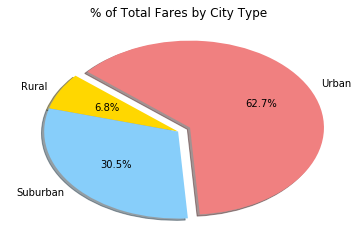

In [6]:
# The group by City type
City_type_gb = combine_city_ride.groupby('type')

# % of Total Fares by City Type
Fare_city_type = City_type_gb['fare'].sum()
# Call the defination to build the pie chart
Build_pie_chart(Fare_city_type.index, Fare_city_type.values)
# Assign the title fot the pie chart
plt.title("% of Total Fares by City Type")
# Save Figure
plt.savefig("Results/Totalfare_citytype_piechart.png")
# Show Figure
plt.show()

## Total Rides by City Type

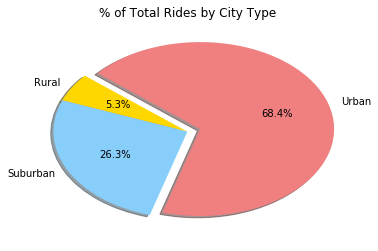

In [7]:
# Calculate Ride Percents
Ride_city_type = City_type_gb['ride_id'].count()
# Call the defination to build the pie chart
Build_pie_chart(Ride_city_type.index, Ride_city_type.values)
# Assign the title fot the pie chart
plt.title("% of Total Rides by City Type")
# Save Figure
plt.savefig("Results/Totalrides_citytype_piechart.png")
# Show Figure
plt.show()

In [8]:
# Show Figure
plt.show()

## Total Drivers by City Type

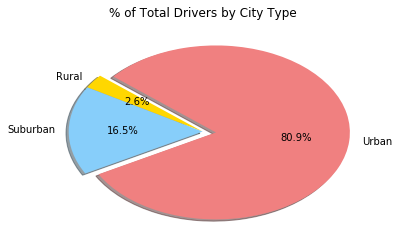

In [10]:
# Calculate Driver Percents
# Get the index of the groupby dataframe
City_and_type_gb = City_type_gb.count()
# calculate the drivers in all cities based on the city type
Rural_drivers = Rural_number_drivers.sum()
Suburban_drivers = Suburban_number_drivers.sum()
Urban_drivers = Urban_number_drivers.sum()

Driver_city_type = [Rural_drivers, Suburban_drivers, Urban_drivers]
# Call the defination to build the pie chart
Build_pie_chart(City_and_type_gb.index, Driver_city_type)
# Assign the title fot the pie chart
plt.title("% of Total Drivers by City Type")
# Save Figure
plt.savefig("Results/Totaldrivers_citytype_piechart.png")
# Show Figure
plt.show()

### Description of three observable trends based on the data
   •	Observation 1: Ride sharing company is more popular in urban cities which means that more drivers and more rides are in the urban cities as compare to other city type. Because of the lot of rides, the average fare is also less If we observe the pie chart, it is very clear that urban cities are way ahead than other city types in terms of percentage of ride, fare or driver count.
   
•	Observation 2: Suburban cities are less popular than the urban cities, but they are more popular than rural cities. They do have more drivers and number of rides as compare to rural cities. The average fare is also in the middle range.

•	Observation 3: This service is not so good in the rural cities, which means that the number of drivers and ride are less than another city type. Also, the average fare is high in this area as compare to other city types. The percentage off are or number of rides are less than 7% as a result number of drivers are less than 3%.
